<h1 style="color: blue; text-align: center; font-size: 25px;"><b>PhiUSIIL: A Machine Learning-Based Phishing URL Classifier</b></h1>
<h1 style="color: blue; text-align: center; font-size: 20px;"><b>DSML Capstone Project</b></h1>

### Problem Description :
With the increasing reliance on the internet for financial transactions, personal communications, and business operations, phishing attacks have emerged as a significant cybersecurity threat. Phishing websites impersonate legitimate entities to deceive users into revealing sensitive information, such as passwords, credit card details, and personal data.

Detecting phishing websites accurately and efficiently is a crucial challenge in cybersecurity. Traditional methods, such as blacklists, fail to detect new phishing sites in real time. Therefore, machine learning-based approaches using URL and webpage source code features have gained prominence in identifying phishing threats proactively.

In this project, we utilize the PhiUSIIL Phishing URL Dataset, which contains 134,850 legitimate URLs and 100,945 phishing URLs, to develop a robust phishing detection model. The dataset includes features extracted from the webpage source code and URL structure, such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb, which are derived from existing URL-based attributes.

### Objective :
To analyze these features and implement machine learning techniques to classify URLs as legitimate or phishing, improving the accuracy and efficiency of phishing detection systems. Through this project, we aim to contribute to the development of automated security solutions that help protect users from online fraud and cyber threats.

### DataSet :
(https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)

### Understand the Dataset

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Loading

In [156]:
data=pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

In [157]:
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [158]:
data.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [159]:
data.shape

(235795, 56)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [161]:
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [162]:
data.groupby("label").describe()

URLLength                                                        \
          count       mean        std   min   25%   50%   75%     max   
label                                                                   
0      100945.0  45.720293  61.145523  13.0  26.0  34.0  48.0  6097.0   
1      134850.0  26.228610   4.815612  15.0  23.0  26.0  29.0    57.0   

      DomainLength             ... NoOfEmptyRef         NoOfExternalRef  \
             count       mean  ...          75%     max           count   
label                          ...                                        
0         100945.0  24.465144  ...          0.0    91.0        100945.0   
1         134850.0  19.228610  ...          3.0  4887.0        134850.0   

                                                               
            mean         std  min   25%   50%    75%      max  
label                                                          
0       1.128119    3.204587  0.0   0.0   0.0    1.0    368.0  
1      85.294601  205.669475  0.0  17.0  46.0  106.0  27516.0  

[2 rows x 400 columns]

## Preprocessing and EDA

**checking for null values**

In [165]:
data.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

**Checking for duplicates**

In [167]:
data.duplicated().sum()

0

<font color=green size=3 >No null values or duplicates founded!

**Check class distribution for finding imbalance**

In [170]:
print(data['label'].value_counts())

label
1    134850
0    100945
Name: count, dtype: int64


In [171]:
#Calculate Class Imbalance Ratio
maj_cls=data['label'].value_counts().max()
min_cls=data['label'].value_counts().min()
ratio=maj_cls/min_cls
print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 1.34


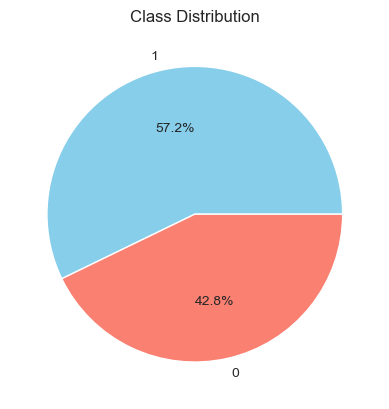

In [172]:
data['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.ylabel("")
plt.show()

Having a mild imbalance (ratio : 1.34), which does not affect the model accuracy.

### Univariate Analysis

**Finding Categorical features for EDA.**

In [176]:
categorical=data.select_dtypes(include='object').columns
categorical

Index(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'], dtype='object')

Column 'FILENAME' can be ignored.

In [178]:
#making a copy
df=data.copy()

In [179]:
df.drop(columns='FILENAME', inplace=True)

In [180]:
updated_categorical=df.select_dtypes(include='object').columns
updated_categorical

Index(['URL', 'Domain', 'TLD', 'Title'], dtype='object')

**Finding numerical featues**

In [182]:
numerical=df.select_dtypes(include='number').columns
numerical

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

**Exclude Binary (0/1) Columns**

In [184]:
# Identify binary columns (only contain 0 and 1)
binary_cols=[col for col in numerical if df[col].nunique()==2]

## Exclude binary columns from numerical analysis
univariate_cols= [col for col in numerical if df[col].nunique()!=2]

print("Numerical columns for univariate analysis:", univariate_cols)
print (f"There are {len(univariate_cols)} numerical features for univariate analysis.")

Numerical columns for univariate analysis: ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
There are 31 numerical features for univariate analysis.


In [185]:
# # Assuming df is your DataFrame and univariate_numerical_cols is your list of columns
# num_cols = len(univariate_cols)
# rows = (num_cols + 1) // 2  # Calculate required rows (ceil division for odd numbers)

# fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))  # Adjust size accordingly
# axes = axes.flatten()  # Flatten in case of multiple rows

# for i, col in enumerate(univariate_cols):
#     sns.histplot(df[col], kde=True, bins=30,ax=axes[i])
#     axes[i].set_title(f'Distribution of {col}')

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()  # Adjust layout for better spacing
# plt.show()


In [186]:
# # Assuming df is your DataFrame and univariate_numerical_cols is your list of columns
# num_cols = len(univariate_cols)
# rows = (num_cols + 1) // 2  # Calculate required rows (ceil division for odd numbers)

# fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))  # Adjust size accordingly
# axes = axes.flatten()  # Flatten in case of multiple rows

# for i, col in enumerate(univariate_cols):
#     sns.boxplot(x=df[col], ax=axes[i])
#     axes[i].set_title(f'Box Plot of {col}')

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()  # Adjust layout for better spacing
# plt.show()

#### Checking Skewness and Kurtosis
**Skewness**

In [188]:
df[univariate_cols].skew()

URLLength                      53.321737
DomainLength                    2.513397
URLSimilarityIndex             -0.989903
CharContinuationRate           -1.128591
TLDLegitimateProb               0.073090
URLCharProb                    -1.064291
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
LetterRatioInURL               -0.066358
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
LineOfCode                     53.072297
LargestLineLength              48.179926
DomainTitleMatchScore          -0.008735
URLTitleMatchScore             -0.089085
NoOfPopup                      84.952694
NoOfiFrame      

**Kurtosis**

In [190]:
df[univariate_cols].kurtosis()

URLLength                       5914.008979
DomainLength                      10.660247
URLSimilarityIndex                -0.408037
CharContinuationRate               0.056455
TLDLegitimateProb                 -1.973777
URLCharProb                        1.461184
TLDLength                         13.738667
NoOfSubDomain                      7.788128
NoOfObfuscatedChar             45903.366997
ObfuscationRatio                2125.333536
NoOfLettersInURL                8587.893558
LetterRatioInURL                   0.015907
NoOfDegitsInURL                14318.789145
DegitRatioInURL                   12.236281
NoOfEqualsInURL                19379.093750
NoOfQMarkInURL                    84.597833
NoOfAmpersandInURL             16435.636935
NoOfOtherSpecialCharsInURL      5657.868346
SpacialCharRatioInURL              0.976044
LineOfCode                      5597.197274
LargestLineLength               3212.606584
DomainTitleMatchScore             -1.992655
URLTitleMatchScore              

<font color=red size=3> High Skewness and Kurtosis founded!!

### Outlier Removal

#### IQR Method (threshold =1.5)

In [194]:
#function for iqr with threshold =1.5
def iqr_1(df1):
    for col in univariate_cols:
        q1=df1[col].quantile(0.25)
        q3=df1[col].quantile(0.75)
        iqr=q3-q1
        l_w=q1-iqr*1.5
        u_w=q3+iqr*1.5

         # Remove extreme outliers
        df1 = df1[(df1[col] >= l_w) & (df1[col] <= u_w)] 
        return df1

#### IQR Method (threshold =3)

In [196]:
#function for iqr with threshold = 3
def iqr_3(df1):
    for col in univariate_cols:
        q1=df1[col].quantile(0.25)
        q3=df1[col].quantile(0.75)
        iqr=q3-q1
        l_w=q1-iqr*3
        u_w=q3+iqr*3

         # Remove extreme outliers
        df1 = df1[(df1[col] >= l_w) & (df1[col] <= u_w)] 
        return df1

#### Z score method

In [198]:
#function for iqr
def zscore(df2):
    from scipy.stats import zscore

    # Select only numeric columns
    numeric_cols = df2.select_dtypes(include=['number']).columns

    # Compute Z-scores only for numeric columns
    z_scores = df2[numeric_cols].apply(zscore)

    # Define threshold (usually 3, but you can adjust)
    threshold = 3

    # Filter out rows where any column's Z-score exceeds the threshold
    df_z_removed = df2[(z_scores < threshold).all(axis=1)].copy()

    return df_z_removed

In [199]:
#Lets choose zscore method
df =  zscore(data)

In [200]:
df.shape

(176873, 56)

In [201]:
df[univariate_cols].skew()

URLLength                      3.044888
DomainLength                   0.972906
URLSimilarityIndex            -1.061957
CharContinuationRate          -1.146505
TLDLegitimateProb              0.014000
URLCharProb                   -0.873290
TLDLength                     -0.423588
NoOfSubDomain                  0.392093
NoOfObfuscatedChar             0.000000
ObfuscationRatio               0.000000
NoOfLettersInURL               2.657845
LetterRatioInURL              -0.061113
NoOfDegitsInURL                4.191757
DegitRatioInURL                2.800723
NoOfEqualsInURL               70.010291
NoOfQMarkInURL                 0.000000
NoOfAmpersandInURL            87.677026
NoOfOtherSpecialCharsInURL     2.409766
SpacialCharRatioInURL          1.077990
LineOfCode                     3.195506
LargestLineLength             12.763882
DomainTitleMatchScore         -0.075615
URLTitleMatchScore            -0.155412
NoOfPopup                      9.587361
NoOfiFrame                     3.733990


Choosing zsore method as it gives more data.

In [203]:
# # Assuming df is your DataFrame and univariate_numerical_cols is your list of columns
# num_cols = len(univariate_cols)
# rows = (num_cols + 1) // 2  # Calculate required rows (ceil division for odd numbers)

# fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))  # Adjust size accordingly
# axes = axes.flatten()  # Flatten in case of multiple rows

# for i, col in enumerate(univariate_cols):
#     sns.boxplot(x=df[col], ax=axes[i])
#     axes[i].set_title(f'Box Plot of {col}')

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()  # Adjust layout for better spacing
# plt.show()

#### For Right-Skewed Data (Positive Skewness):
Use log, square root, or box-cox transformation.

In [205]:
right_skewed_cols = df[univariate_cols].skew()[df[univariate_cols].skew() > 1].index.tolist()
df[right_skewed_cols].skew()

URLLength                      3.044888
NoOfLettersInURL               2.657845
NoOfDegitsInURL                4.191757
DegitRatioInURL                2.800723
NoOfEqualsInURL               70.010291
NoOfAmpersandInURL            87.677026
NoOfOtherSpecialCharsInURL     2.409766
SpacialCharRatioInURL          1.077990
LineOfCode                     3.195506
LargestLineLength             12.763882
NoOfPopup                      9.587361
NoOfiFrame                     3.733990
NoOfImage                      3.023513
NoOfCSS                        4.022458
NoOfJS                         1.912439
NoOfSelfRef                    2.277562
NoOfEmptyRef                   5.319979
NoOfExternalRef                2.708295
dtype: float64

In [206]:
df1=df.copy()
from scipy.stats import boxcox
for col in right_skewed_cols:
    skewness = df1[col].skew()
    if skewness > 1:  # Highly skewed
        df1[col], _ = boxcox(df1[col] + 1)
df1[right_skewed_cols].skew()    

URLLength                      0.010997
NoOfLettersInURL              -0.020660
NoOfDegitsInURL                1.715554
DegitRatioInURL                1.741957
NoOfEqualsInURL               59.451831
NoOfAmpersandInURL            87.677026
NoOfOtherSpecialCharsInURL     0.501257
SpacialCharRatioInURL          0.269575
LineOfCode                    -0.153562
LargestLineLength             -0.007647
NoOfPopup                      3.972324
NoOfiFrame                     0.860710
NoOfImage                      0.016255
NoOfCSS                        0.127167
NoOfJS                        -0.003129
NoOfSelfRef                    0.038380
NoOfEmptyRef                   0.942671
NoOfExternalRef                0.040579
dtype: float64

#### For Left-Skewed Data (Negative Skewness):
Use power transformation (square or cube root) or negation.

In [208]:
df2=df.copy()
left_skewed_cols = df2[univariate_cols].skew()[df2[univariate_cols].skew() <-1 ].index.tolist()
df2[left_skewed_cols].skew()

URLSimilarityIndex     -1.061957
CharContinuationRate   -1.146505
dtype: float64

In [209]:
# Apply square transformation
for col in left_skewed_cols:
     df2[col] = df2[col] ** 2
df2[left_skewed_cols].skew()

URLSimilarityIndex     -0.754084
CharContinuationRate   -0.903905
dtype: float64

A cleaned dataset is created from df1 and df2.

In [211]:
df_cleaned=df.copy()
df_cleaned[left_skewed_cols]=df2[left_skewed_cols]
df_cleaned[right_skewed_cols]=df1[right_skewed_cols]

In [212]:
df_cleaned[univariate_cols].skew()

URLLength                      0.010997
DomainLength                   0.972906
URLSimilarityIndex            -0.754084
CharContinuationRate          -0.903905
TLDLegitimateProb              0.014000
URLCharProb                   -0.873290
TLDLength                     -0.423588
NoOfSubDomain                  0.392093
NoOfObfuscatedChar             0.000000
ObfuscationRatio               0.000000
NoOfLettersInURL              -0.020660
LetterRatioInURL              -0.061113
NoOfDegitsInURL                1.715554
DegitRatioInURL                1.741957
NoOfEqualsInURL               59.451831
NoOfQMarkInURL                 0.000000
NoOfAmpersandInURL            87.677026
NoOfOtherSpecialCharsInURL     0.501257
SpacialCharRatioInURL          0.269575
LineOfCode                    -0.153562
LargestLineLength             -0.007647
DomainTitleMatchScore         -0.075615
URLTitleMatchScore            -0.155412
NoOfPopup                      3.972324
NoOfiFrame                     0.860710


In [213]:
# Exclude binary columns from numerical analysis
univariate_cols_cleaned = [col for col in univariate_cols if df_cleaned[col].nunique() != 2]

# Create a copy of the list to avoid modifying it while iterating
cols_to_drop = []

for col in univariate_cols_cleaned:
    if df_cleaned[col].skew() > 1:
        cols_to_drop.append(col)

# Drop the identified columns at once
df_cleaned.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [214]:
# Update the univariate_cols_cleaned list to reflect the remaining columns
univariate_cols_cleaned = [col for col in univariate_cols_cleaned if col not in cols_to_drop]

# Check skewness only for existing columns
df_cleaned[univariate_cols_cleaned].skew()

URLLength                     0.010997
DomainLength                  0.972906
URLSimilarityIndex           -0.754084
CharContinuationRate         -0.903905
TLDLegitimateProb             0.014000
URLCharProb                  -0.873290
TLDLength                    -0.423588
NoOfSubDomain                 0.392093
NoOfObfuscatedChar            0.000000
ObfuscationRatio              0.000000
NoOfLettersInURL             -0.020660
LetterRatioInURL             -0.061113
NoOfQMarkInURL                0.000000
NoOfOtherSpecialCharsInURL    0.501257
SpacialCharRatioInURL         0.269575
LineOfCode                   -0.153562
LargestLineLength            -0.007647
DomainTitleMatchScore        -0.075615
URLTitleMatchScore           -0.155412
NoOfiFrame                    0.860710
NoOfImage                     0.016255
NoOfCSS                       0.127167
NoOfJS                       -0.003129
NoOfSelfRef                   0.038380
NoOfEmptyRef                  0.942671
NoOfExternalRef          

<font color=green size=3>Now a cleaned data with removed skewness is ready in df_cleaned !!

In [216]:
#saving the cleaned dataset
df_cleaned.to_csv("cleaned_url_data.csv", index=False)

### Lets do some Analysis 

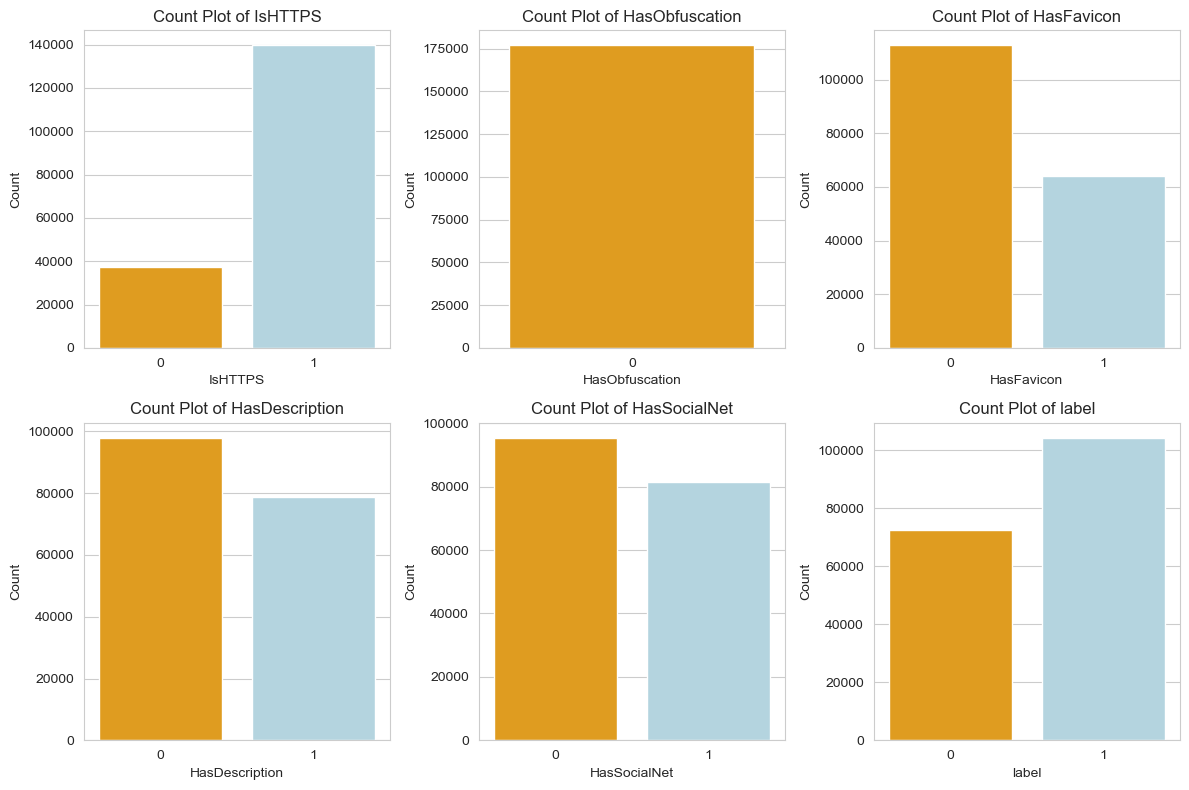

In [218]:
# List of relevant binary features
binary_features = ['IsHTTPS', 'HasObfuscation', 'HasFavicon', 'HasDescription', 'HasSocialNet', 'label']

plt.figure(figsize=(12, 8))
for i, col in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.countplot(x=df_cleaned[col], palette=['orange', 'lightblue'])
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### Insights
* IsHTTPS: Most URLs use HTTPS, indicating that HTTPS alone is not a strong indicator of legitimacy.
* HasObfuscation: Very few URLs use obfuscation, suggesting it is not a common technique for phishing.
* HasFavicon: Many phishing URLs lack favicons, making it a potential indicator for phishing detection.
* HasDescription: Many URLs lack a meta description, which could be a potential phishing indicator.
* HasSocialNet: A significant number of URLs do not contain social network links, suggesting that legitimate sites may include them more often.
* Label: The dataset contains more phishing URLs than legitimate ones, indicating an imbalance that may affect model performance.                                                                           

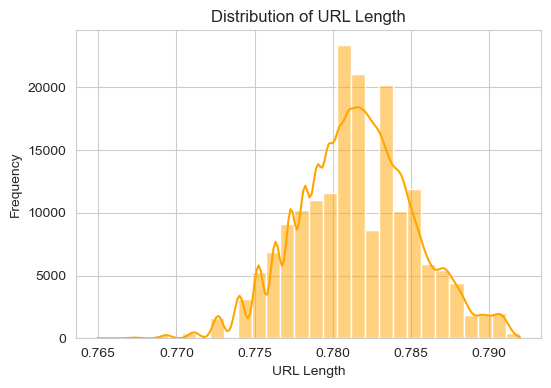

In [220]:
# Set plot style
sns.set_style("whitegrid")

# Histogram: URL Length Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['URLLength'], bins=30, kde=True, color='orange')
plt.title("Distribution of URL Length")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()

#### Insights :
Distribution of URL Length: The URL length follows a right-skewed distribution, with most URLs concentrated around a specific range, suggesting that longer URLs might be more common in phishing attempts.

### Bivariate Analysis

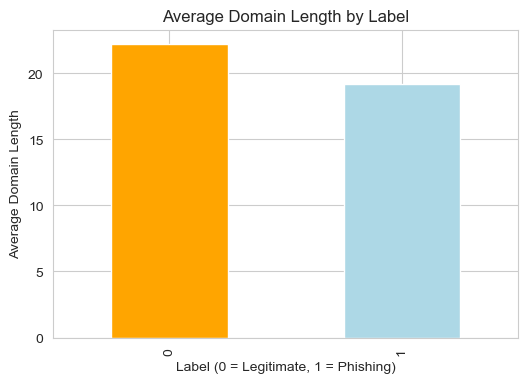

In [223]:
plt.figure(figsize=(6, 4))
df_cleaned.groupby('label')['DomainLength'].mean().plot(kind='bar', color=['orange', 'lightblue'])
plt.title("Average Domain Length by Label")
plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Average Domain Length")
plt.show()

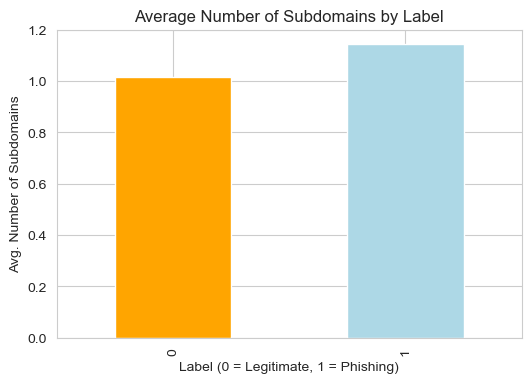

In [224]:
# Bar Chart: Average Number of Subdomains by Label
plt.figure(figsize=(6, 4))
df_cleaned.groupby('label')['NoOfSubDomain'].mean().plot(kind='bar', color=['orange', 'lightblue'])
plt.title("Average Number of Subdomains by Label")
plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Avg. Number of Subdomains")
plt.show()

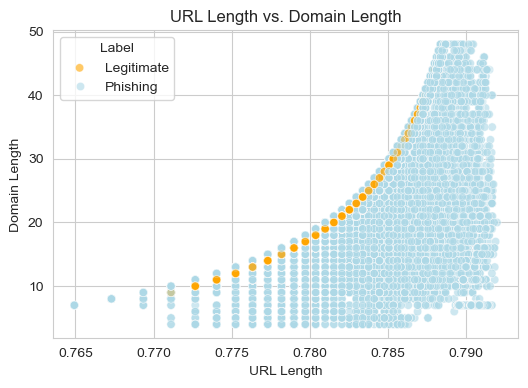

In [225]:
# Scatter Plot: URL Length vs. Domain Length
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['URLLength'], y=df_cleaned['DomainLength'], hue=df_cleaned['label'], palette=['lightblue','orange'], alpha=0.6)
plt.title("URL Length vs. Domain Length")
plt.xlabel("URL Length")
plt.ylabel("Domain Length")
plt.legend(title="Label", labels=["Legitimate", "Phishing"])
plt.show()

#### Multivariate Analysis

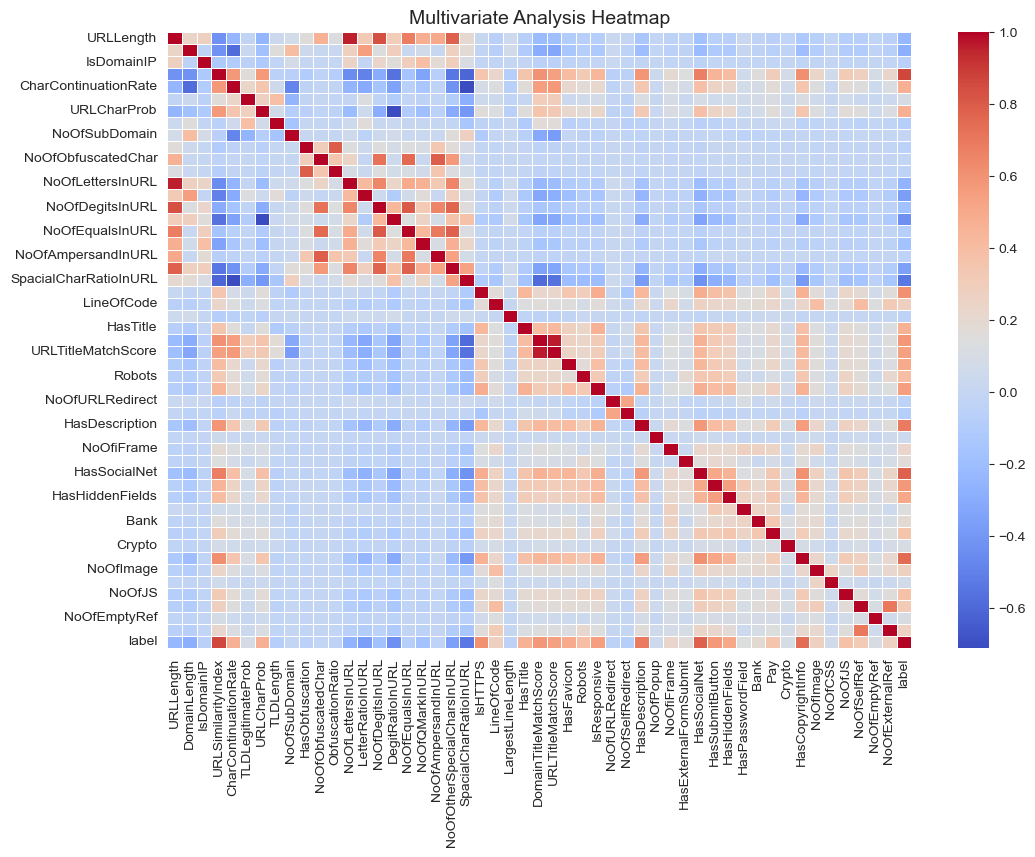

In [227]:
# Compute the correlation matrix
corr_matrix = data[numerical].corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Generate heatmap
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Show plot
plt.title("Multivariate Analysis Heatmap", fontsize=14)
plt.show()

In [228]:
#Droping highly correlated features (Either 'URL length' or 'NoOfLettersInURL' )
df_cleaned.drop(columns='NoOfLettersInURL',inplace=True)

### Encoding categorical values
Label encoding for ordinal and One hot for Nominal.

In [230]:
categorical_cols=df_cleaned.select_dtypes(include=['object']).columns
categorical_cols

Index(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'], dtype='object')

In [231]:
df_cleaned.drop(columns="FILENAME",inplace=True) #suggested by the dataset providers

In [232]:
df_cleaned.select_dtypes(include=['object']).head()

,URL,Domain,TLD,Title
0,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
5,https://www.globalreporting.org,www.globalreporting.org,org,gri - home
7,https://www.nerdscandy.com,www.nerdscandy.com,com,nerds candy


In [233]:
df_cleaned['URL'].nunique()

176585

In [234]:
# Drop URL
# Why : 
''' It’s a unique identifier and won’t help in modeling directly.The URL column has 176,585 unique values, meaning almost every URL is unique.
Label Encoding would assign arbitrary numbers, but the model wouldn’t learn meaningful patterns.'''

df_cleaned.drop(columns=['URL'], inplace=True)

In [235]:
df_cleaned['Domain'].nunique()

168819

In [236]:
# Drop Domain
#Why :
'''Avoids high cardinality, reduces memory usage.Label encoding adds no meaningful order, ineffective for high-cardinality data'''

df_cleaned.drop(columns=['Domain'], inplace=True)

In [237]:
df_encoded=df_cleaned.copy()
# Target Encoding for TLD
'''Why: Target Encoding (also known as Mean Encoding) is preferred for TLD (Top-Level Domain) because Target Encoding replaces each TLD with its
mean target value → keeps a single column → reduces complexity.'''

tld_target_mean = df_encoded.groupby('TLD')['label'].mean()
df_encoded['TLD'] = df_encoded['TLD'].map(tld_target_mean)

# TF-IDF for Title
'''Why: Title is a text feature (not categorical), so it cannot be directly used in machine learning models.
TF-IDF converts text into numerical vectors by capturing the importance of words.
Instead of simple counting (Bag-of-Words approach), TF-IDF weighs words based on how frequently they appear across all titles.'''
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)

# Transform 'Title' column
title_features = tfidf.fit_transform(df_encoded['Title']).toarray()

# Replace 'Title' with mean TF-IDF score for each row
df_encoded['Title'] = np.mean(title_features, axis=1)

df_encoded.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,0.783380,24,0,0.593502,10000.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,3.433358,2.135550,3.395363,4.441183,0.000000,4.314900,1
1,0.778984,16,0,0.827297,10000.0,0.444444,0.032650,0.050207,2,1,...,0,0,1,3.782997,1.753270,2.209152,3.480921,0.000000,4.751360,1
2,0.782528,22,0,0.952503,10000.0,0.751111,0.028555,0.064129,2,2,...,0,0,1,2.341984,0.961385,2.090122,3.545170,0.489458,1.717669,1
5,0.782970,23,0,0.874781,10000.0,1.000000,0.079963,0.060614,3,1,...,0,0,1,3.459611,0.636724,2.500169,4.163558,0.000000,2.541198,1
7,0.780371,18,0,0.593502,10000.0,1.000000,0.522907,0.060486,3,1,...,0,0,1,3.118664,0.961385,3.159821,3.411495,0.000000,2.597863,1


In [296]:
# Compute correlation of all features with the target
correlation = df_encoded.corr()['label'].sort_values(ascending=False)

print(correlation)

label                         1.000000
URLSimilarityIndex            0.917681
NoOfSelfRef                   0.858446
NoOfImage                     0.855575
LineOfCode                    0.851770
NoOfExternalRef               0.851597
NoOfJS                        0.837072
NoOfCSS                       0.800045
HasSocialNet                  0.762386
HasCopyrightInfo              0.741159
HasDescription                0.671019
IsHTTPS                       0.620123
DomainTitleMatchScore         0.573353
HasSubmitButton               0.558639
LargestLineLength             0.529117
URLTitleMatchScore            0.527337
IsResponsive                  0.521483
TLD                           0.519788
NoOfEmptyRef                  0.505630
HasFavicon                    0.497603
NoOfiFrame                    0.496048
HasTitle                      0.479871
HasHiddenFields               0.472806
CharContinuationRate          0.428147
URLCharProb                   0.396451
Robots                   

The NaN values in correlation results indicate that these features (IsDomainIP, HasObfuscation, NoOfObfuscatedChar, etc.) have missing values, constant values, or contain non-numeric data. Hope doing feature selection would remove those features which shows no relation with target.

### Feature Selection using Select KBest method
Because of large number of features, We need to choose the best set and doing further analysis.

#### Use the Elbow Method (Optimal Feature Selection)
For choosing k vlaue for SelectKBest method. We are using Elbow method.

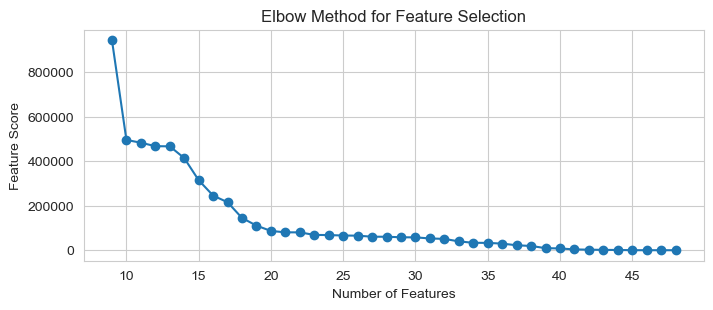

In [307]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_encoded.drop(columns=['label'])
y = df_encoded['label']

# Compute feature scores
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

# Sort scores in descending order
sorted_scores = np.sort(scores)[::-1]

# Plot scores to find the "elbow"
plt.figure(figsize=(8,3))
plt.plot(range(1, len(scores) + 1), sorted_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Feature Score")
plt.title("Elbow Method for Feature Selection")
plt.show()

choosing 25 as k value 

In [314]:
# Using Select Kbest method 
from sklearn.feature_selection import SelectKBest

# Compute feature scores
selector = SelectKBest(score_func=f_classif, k=25)
X_selected = selector.fit_transform(X, y)


# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'IsResponsive', 'HasDescription',
       'NoOfiFrame', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'],
      dtype='object')


In [320]:
#Checking correlation once more
# Compute correlation of all features with the target
correlation = df_encoded[(['TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'IsResponsive', 'HasDescription',
       'NoOfiFrame', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef','label'])].corr()['label'].sort_values(ascending=False)

print(correlation)

label                         1.000000
URLSimilarityIndex            0.917681
NoOfSelfRef                   0.858446
NoOfImage                     0.855575
LineOfCode                    0.851770
NoOfExternalRef               0.851597
NoOfJS                        0.837072
NoOfCSS                       0.800045
HasSocialNet                  0.762386
HasCopyrightInfo              0.741159
HasDescription                0.671019
IsHTTPS                       0.620123
DomainTitleMatchScore         0.573353
HasSubmitButton               0.558639
LargestLineLength             0.529117
URLTitleMatchScore            0.527337
IsResponsive                  0.521483
TLD                           0.519788
NoOfEmptyRef                  0.505630
HasFavicon                    0.497603
NoOfiFrame                    0.496048
HasTitle                      0.479871
HasHiddenFields               0.472806
CharContinuationRate          0.428147
SpacialCharRatioInURL        -0.504999
NoOfOtherSpecialCharsInUR

<font color=green size=3>We got the features with best correlation with the target for training!!